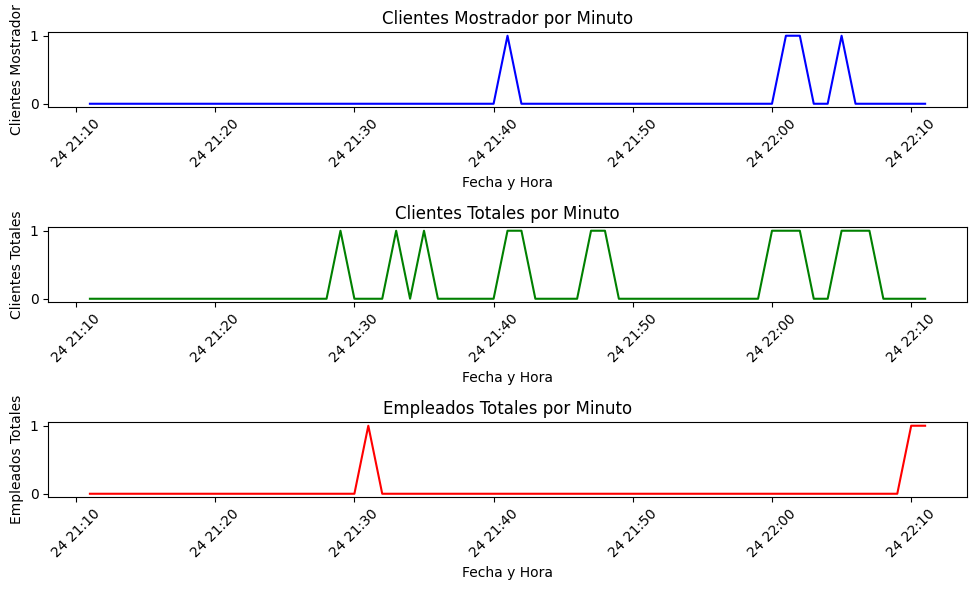

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar el CSV
df = pd.read_csv(r'C:\Users\Matko\Desktop\UEM\Proyecto Grupal\ProyectoGrupal-G3-UEM\grabaciones\Salida\csv\grabacion_2025-02-24_21-11-19.csv')

# Eliminar las columnas x_cliente e y_cliente
df = df.drop(columns=['x_cliente', 'y_cliente'])

# Convertir la columna 'fecha_hora' a tipo datetime
df['fecha_hora'] = pd.to_datetime(df['fecha_hora'])

# Agrupar por minuto
df['minuto'] = df['fecha_hora'].dt.strftime('%Y-%m-%d %H:%M')  # agrupar por minuto
df_minute = df.groupby('minuto').agg({
    'clientes_mostrador': lambda x: x.mode()[0] if not x.mode().empty else np.nan,
    'clientes_totales': lambda x: x.mode()[0] if not x.mode().empty else np.nan,
    'empleados_totales': lambda x: x.mode()[0] if not x.mode().empty else np.nan
}).reset_index()

# Convertir 'minuto' de vuelta a datetime
df_minute['fecha_hora'] = pd.to_datetime(df_minute['minuto'])

# Crear las gráficas
plt.figure(figsize=(10, 6))

# Gráfica para clientes mostrador
plt.subplot(3, 1, 1)
plt.plot(df_minute['fecha_hora'], df_minute['clientes_mostrador'], label='Clientes Mostrador', color='b')
plt.xlabel('Fecha y Hora')
plt.ylabel('Clientes Mostrador')
plt.title('Clientes Mostrador por Minuto')
plt.xticks(rotation=45)

# Gráfica para clientes totales
plt.subplot(3, 1, 2)
plt.plot(df_minute['fecha_hora'], df_minute['clientes_totales'], label='Clientes Totales', color='g')
plt.xlabel('Fecha y Hora')
plt.ylabel('Clientes Totales')
plt.title('Clientes Totales por Minuto')
plt.xticks(rotation=45)

# Gráfica para empleados totales
plt.subplot(3, 1, 3)
plt.plot(df_minute['fecha_hora'], df_minute['empleados_totales'], label='Empleados Totales', color='r')
plt.xlabel('Fecha y Hora')
plt.ylabel('Empleados Totales')
plt.title('Empleados Totales por Minuto')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


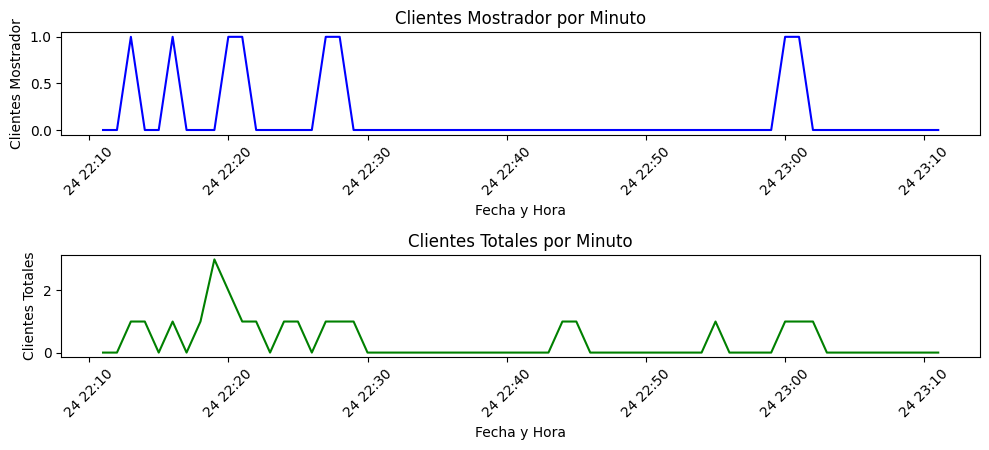

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar el CSV
df = pd.read_csv(r'C:\Users\Matko\Desktop\UEM\Proyecto Grupal\ProyectoGrupal-G3-UEM\grabaciones\Salida\csv\grabacion_2025-02-24_22-11-19.csv')


# Eliminar las columnas x_cliente e y_cliente
df = df.drop(columns=['x_cliente', 'y_cliente'])

# Convertir la columna 'fecha_hora' a tipo datetime
df['fecha_hora'] = pd.to_datetime(df['fecha_hora'])

# Obtener el primer registro (más antiguo)
primer_registro = df['fecha_hora'].min()

# Calcular la diferencia en minutos con respecto al primer registro
df['minuto_video'] = (df['fecha_hora'] - primer_registro).dt.total_seconds() // 60

# Agrupar por minuto
df['minuto'] = df['fecha_hora'].dt.strftime('%Y-%m-%d %H:%M')  # agrupar por minuto
df_minute = df.groupby('minuto').agg({
    'clientes_mostrador': lambda x: x.mode()[0] if not x.mode().empty else np.nan,
    'clientes_totales': lambda x: x.mode()[0] if not x.mode().empty else np.nan,
    'empleados_totales': lambda x: x.mode()[0] if not x.mode().empty else np.nan,
    'minuto_video': 'first'  # Mantener el primer valor del minuto_video en cada grupo
}).reset_index()

# Convertir 'minuto' de vuelta a datetime
df_minute['fecha_hora'] = pd.to_datetime(df_minute['minuto'])

# Crear las gráficas
plt.figure(figsize=(10, 6))

# Gráfica para clientes mostrador
plt.subplot(3, 1, 1)
plt.plot(df_minute['fecha_hora'], df_minute['clientes_mostrador'], label='Clientes Mostrador', color='b')
plt.xlabel('Fecha y Hora')
plt.ylabel('Clientes Mostrador')
plt.title('Clientes Mostrador por Minuto')
plt.xticks(rotation=45)

# Gráfica para clientes totales
plt.subplot(3, 1, 2)
plt.plot(df_minute['fecha_hora'], df_minute['clientes_totales'], label='Clientes Totales', color='g')
plt.xlabel('Fecha y Hora')
plt.ylabel('Clientes Totales')
plt.title('Clientes Totales por Minuto')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()


In [21]:
df_minute[df_minute['clientes_totales']>0]

,minuto,clientes_mostrador,clientes_totales,empleados_totales,minuto_video,fecha_hora
18,2025-02-24 21:29,0,1,0,17.0,2025-02-24 21:29:00
22,2025-02-24 21:33,0,1,0,21.0,2025-02-24 21:33:00
24,2025-02-24 21:35,0,1,0,23.0,2025-02-24 21:35:00
30,2025-02-24 21:41,1,1,0,29.0,2025-02-24 21:41:00
31,2025-02-24 21:42,0,1,0,30.0,2025-02-24 21:42:00
36,2025-02-24 21:47,0,1,0,35.0,2025-02-24 21:47:00
37,2025-02-24 21:48,0,1,0,36.0,2025-02-24 21:48:00
49,2025-02-24 22:00,0,1,0,48.0,2025-02-24 22:00:00
50,2025-02-24 22:01,1,1,0,49.0,2025-02-24 22:01:00
51,2025-02-24 22:02,1,1,0,50.0,2025-02-24 22:02:00
